In [1]:
# Install necessary libraries
!pip install transformers accelerate -q
!pip install git+https://github.com/huggingface/diffusers
!pip install flask pyngrok Pillow numpy trimesh rembg torch matplotlib
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 98.9 MB/s eta 0:00:00
  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-fzg50wth
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-fzg50w

In [2]:
# Import necessary modules
from flask import Flask, request, send_file, render_template_string
from pyngrok import ngrok, conf
import os
import io
from PIL import Image
import numpy as np
import trimesh
from rembg import remove
import torch
from diffusers import ShapEPipeline, ShapEImg2ImgPipeline
from diffusers.utils import export_to_obj
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [3]:
# Define pipeline of Image-to-3D_model
pipe_i = ShapEImg2ImgPipeline.from_pretrained("openai/shap-e-img2img", torch_dtype=torch.float16).to("cuda")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/1.21G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/905M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/493 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/315 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/276 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/496 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/905M [00:00<?, ?B/s]

The config attributes {'renderer': ['shap_e', 'ShapERenderer']} were passed to ShapEImg2ImgPipeline, but are not expected and will be ignored. Please verify your model_index.json configuration file.
Keyword arguments {'renderer': ['shap_e', 'ShapERenderer']} are not expected by ShapEImg2ImgPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--openai--shap-e-img2img/snapshots/0e0aba80f08d368aaf6af9cb93583707481cc29b/prior: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--openai--shap-e-img2img/snapshots/0e0aba80f08d368aaf6af9cb93583707481cc29b/prior.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--openai--shap-e-img2img/snapshots/0e0aba80f08d368aaf6af9cb93583707481cc29b/shap_e_renderer: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--openai--shap-e-img2img/snapshots/0e0aba80f08d368aaf6af9cb93583707481cc29b/shap_e_renderer.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


In [4]:
# Define pipeline of Text-to-3D_model
ckpt_id = "openai/shap-e"
pipe = ShapEPipeline.from_pretrained(ckpt_id).to("cuda")

model_index.json:   0%|          | 0.00/458 [00:00<?, ?B/s]

Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/905M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/489 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/496 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/626 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/276 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/905M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/495M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

The config attributes {'renderer': ['shap_e', 'ShapERenderer']} were passed to ShapEPipeline, but are not expected and will be ignored. Please verify your model_index.json configuration file.
Keyword arguments {'renderer': ['shap_e', 'ShapERenderer']} are not expected by ShapEPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--openai--shap-e/snapshots/7bd337afdea1c17842e1c3cc45c4e268356dba40/prior: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--openai--shap-e/snapshots/7bd337afdea1c17842e1c3cc45c4e268356dba40/prior.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--openai--shap-e/snapshots/7bd337afdea1c17842e1c3cc45c4e268356dba40/shap_e_renderer: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--openai--shap-e/snapshots/7bd337afdea1c17842e1c3cc45c4e268356dba40/shap_e_renderer.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


In [5]:
# Setup directories
os.makedirs('uploads', exist_ok=True)
os.makedirs('outputs', exist_ok=True)

app = Flask(__name__)

# Configure ngrok
# --- IMPORTANT: Replace with your actual ngrok Authtoken ---
NGROK_AUTH_TOKEN = "your_ngrok_token"
conf.get_default().auth_token = NGROK_AUTH_TOKEN

# Start ngrok
try:
    public_url = ngrok.connect(5000)
    print(" * Public URL:", public_url)
except Exception as e:
    print(f"Error starting ngrok: {e}")
    public_url = "ngrok not running"

 * Public URL: NgrokTunnel: "https://1e54-34-16-208-10.ngrok-free.app" -> "http://localhost:5000"


In [6]:
# Function to generate 3D model from text
def generate_from_text(prompt,output_format):
    guidance_scale = 15.0
    images = pipe(prompt, guidance_scale=guidance_scale, num_inference_steps=64, frame_size=256, output_type="mesh").images

    # Export as OBJ
    export_to_obj(images[0], f'outputs/{prompt}.obj')

    # Export as STL
    if output_format=='stl':
        mesh = trimesh.load(f'outputs/{prompt}.obj')
        mesh.export(f'outputs/{prompt}.stl')

In [7]:
# Function to generate 3D mesh from image
def generate_from_image(image_path,output_format):

    image_name = image_path.split('/')[1].split('.')[0]

    with open(image_path, "rb") as i:
        bgr_image = remove(i.read())

    image = Image.open(io.BytesIO(bgr_image))

    guidance_scale = 3.0
    image = image.resize((256, 256))

    images = pipe_i(
        image,
        guidance_scale=guidance_scale,
        num_inference_steps=64,
        frame_size=256,
        output_type="mesh"
    ).images

    # Export as OBJ
    export_to_obj(images[0], f'outputs/{image_name}.obj')

    # Export as STL
    if output_format=='stl':
        mesh = trimesh.load(f'outputs/{image_name}.obj')
        mesh.export(f'outputs/{image_name}.stl')

In [8]:
# HTML template with options for image upload or text prompt
HTML_TEMPLATE = '''
<!DOCTYPE html>
<html>
<head><title>Image/Text to 3D</title></head>
<body>
<h1>Generate 3D Model</h1>
<p>Choose input type, upload an image or enter text, then click Generate.</p>
<hr>
<form method="POST" enctype="multipart/form-data">
    <label><strong>Choose Input Type:</strong></label><br>
    <input type="radio" id="radio_image" name="input_type" value="image" checked>
    <label for="radio_image">Image Upload (Generates 2.5D Mesh using MiDaS)</label><br>
    <input type="radio" id="radio_text" name="input_type" value="text">
    <label for="radio_text">Text Prompt (Generates Point Cloud using Point-E)</label><br><br>

    <div id="image_input">
        <label for="file_input">Select Image:</label><br>
        <input type="file" id="file_input" name="file" accept="image/*"><br><br>
    </div>

    <div id="text_input" style="display:none;">
        <label for="text_prompt">Enter Text Prompt:</label><br>
        <input type="text" id="text_prompt" name="text" placeholder="e.g., a red chair" size="50"><br><br>
    </div>

    <label><strong>Choose Output Format:</strong></label><br>
    <select name="output_format">
        <option value="stl" selected>STL (for 3D printing)</option>
        <option value="obj">OBJ (general 3D format)</option>
    </select><br><br>

    <input type="submit" value="Generate 3D Model">
</form>
<hr>
<p><i>Ngrok URL: {{ public_url }}</i></p>

<script>
    // JavaScript to toggle visibility of input fields based on radio button selection
    const radioImage = document.getElementById('radio_image');
    const radioText = document.getElementById('radio_text');
    const imageInputDiv = document.getElementById('image_input');
    const textInputDiv = document.getElementById('text_input');
    const fileInput = document.getElementById('file_input');
    const textPromptInput = document.getElementById('text_prompt');

    function toggleInputs() {
        if (radioImage.checked) {
            imageInputDiv.style.display = 'block';
            textInputDiv.style.display = 'none';
            fileInput.required = true; // Make file input required for image mode
            textPromptInput.required = false;
        } else {
            imageInputDiv.style.display = 'none';
            textInputDiv.style.display = 'block';
            fileInput.required = false;
            textPromptInput.required = true; // Make text input required for text mode
        }
    }

    radioImage.addEventListener('change', toggleInputs);
    radioText.addEventListener('change', toggleInputs);

    // Initial setup on page load
    toggleInputs();
</script>
</body>
</html>
'''

In [9]:
@app.route('/', methods=['GET', 'POST'])
def home():
    if request.method == 'POST':
        input_type = request.form.get('input_type')
        output_format = request.form.get('output_format', 'stl').lower()
        output_path = None
        mime_type = 'application/octet-stream'

        if input_type == 'image':
            if 'file' not in request.files:
                return "No file part", 400
            file = request.files['file']
            if file.filename == '':
                return "No selected file", 400

            if file:
                filename = os.path.join('uploads', os.path.basename(file.filename))
                file.save(filename)
                print(f"File uploaded: {filename}")

                base_name = filename.split('/')[1].split('.')[0]
                generate_from_image(filename,output_format)

                if output_format == 'stl':
                    output_path = os.path.join('outputs', base_name + '.stl')
                    mime_type = 'model/stl'
                elif output_format == 'obj':
                    output_path = os.path.join('outputs', base_name + '.obj')
                    mime_type = 'model/obj'

        elif input_type == 'text':
            prompt = request.form.get('text')
            if not prompt:
                return "Text prompt cannot be empty", 400

            print(f"Received text prompt: {prompt}")
            base_name = prompt
            generate_from_text(prompt,output_format)

            if output_format == 'obj':
                output_path = os.path.join('outputs', base_name + '.obj')
                mime_type = 'model/obj'
            elif output_format == 'stl':
                output_path = os.path.join('outputs', base_name + '.stl')
                mime_type = 'model/stl'

        else:
            return "Invalid input type selected", 400

        # Send the generated file
        if output_path and os.path.exists(output_path):
            print(f"Sending file: {output_path} with MIME type: {mime_type}")
            try:
                return send_file(output_path, as_attachment=True, mimetype=mime_type)
            except Exception as e:
                print(f"Error sending file: {e}")
                return "Error sending the generated file.", 500
        else:
            generation_type = "Mesh" if input_type == 'image' else "Point Cloud"
            print(f"{generation_type} generation failed.")
            return f"Could not generate the 3D model from the provided {input_type}.", 500

    return render_template_string(HTML_TEMPLATE, public_url=str(public_url))

In [10]:
# Main execution block
if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [29/Apr/2025 09:07:43] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [29/Apr/2025 09:07:44] "GET /favicon.ico HTTP/1.1" 404 -


Received text prompt: a blue sports car


  0%|          | 0/127 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [29/Apr/2025 09:09:04] "POST / HTTP/1.1" 200 -


Sending file: outputs/a blue sports car.obj with MIME type: model/obj


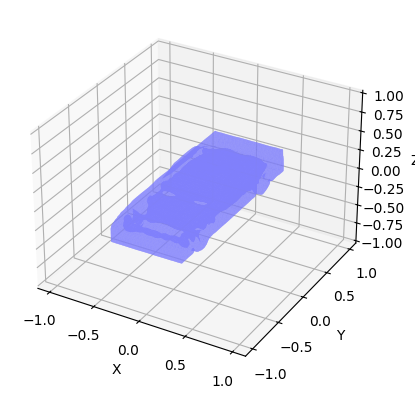

In [12]:
# Visualization using matplotlib
mesh = trimesh.load('your/3dmodel/path')

vertices = mesh.vertices
faces = mesh.faces

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

mesh_collection = Poly3DCollection(vertices[faces], alpha=0.7)
mesh_collection.set_facecolor([0.5, 0.5, 1])  # light blue

ax.add_collection3d(mesh_collection)

scale = vertices.flatten()
ax.auto_scale_xyz(scale, scale, scale)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.show()